In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1, L2

In [6]:
# load the dataset
from utils import read_cup
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
# Define metric MEE

import keras.backend as K


def MEE_keras(y_true, y_pred):
    """
    Euclidean distance loss
    https://en.wikipedia.org/wiki/Euclidean_distance
    :param y_true: TensorFlow/Theano tensor
    :param y_pred: TensorFlow/Theano tensor of the same shape as y_true
    :return: float
    """
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

In [11]:
nn = Sequential()
nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=L2(1e-8)))
nn.add(Dense(64, activation='relu', kernel_regularizer=L2(1e-8)))
nn.add(Dense(3, activation='linear', kernel_regularizer=L2(1e-8)))

nn.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9, nesterov=True), loss='MSE', metrics=MEE_keras)

history = nn.fit(X_train, y_train, epochs=1000, batch_size=1)

Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 83.0678 - MEE_keras: 9.8609
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 5.4887 - MEE_keras: 3.4275
Epoch 3/1000
800/800 [==============================] - 1s 2ms/step - loss: 4.0610 - MEE_keras: 2.9394
Epoch 4/1000
800/800 [==============================] - 2s 2ms/step - loss: 3.1826 - MEE_keras: 2.6247
Epoch 5/1000
800/800 [==============================] - 2s 2ms/step - loss: 2.6868 - MEE_keras: 2.4028
Epoch 6/1000
800/800 [==============================] - 2s 2ms/step - loss: 2.2250 - MEE_keras: 2.2266
Epoch 7/1000
800/800 [==============================] - 1s 2ms/step - loss: 2.0775 - MEE_keras: 2.1644
Epoch 8/1000
800/800 [==============================] - 1s 2ms/step - loss: 1.7591 - MEE_keras: 1.9770
Epoch 9/1000
800/800 [==============================] - 1s 2ms/step - loss: 1.7513 - MEE_keras: 1.9624
Epoch 10/1000
800/800 [==============================] - 1s 2ms/step - l

In [13]:
history.history.keys()

dict_keys(['loss', 'MEE_keras'])

7/7 [==============================] - 0s 3ms/step - loss: 0.2634 - MEE_keras: 0.6746
Test Loss: 0.2634
Test MEE: 0.6746


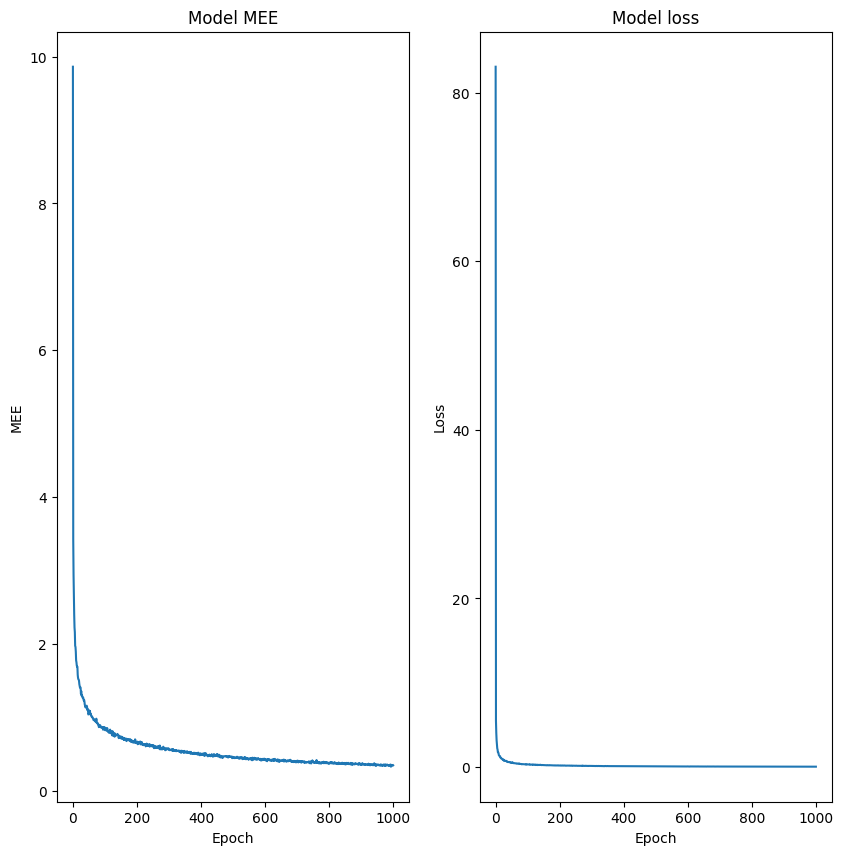

In [14]:
# test loss and mee
loss, MEE_keras = nn.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test MEE: {MEE_keras:.4f}')

history = history.history

# plot training mee values
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(history['MEE_keras'])
plt.title('Model MEE')
plt.ylabel('MEE')
plt.xlabel('Epoch')

# plot training loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()